In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_csv("chennai_house_price_prediction.csv")
data.shape

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(7109, 19)

## Data Manipulation

In [3]:
data.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [4]:
data.describe(include="all")

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P07341,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


In [5]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

### Dealing with missing values

#### Bedroom Missing values

In [6]:
data[data["N_BEDROOM"].isnull()]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
4060,P01066,Anna Nagar,1556,181,NaN,1.0,4,Partiall,No,House,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,107978,10797790


In [7]:
mod=data[data["N_BATHROOM"]==1].N_BEDROOM.mode()
mod

0    1.0
dtype: float64

In [8]:
data["N_BEDROOM"].fillna(mod[0],inplace=True)

#### Bathroom missing values

In [9]:
data[data["N_BATHROOM"].isnull()].head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,85486,12212350
5087,P01333,Chrompet,1016,105,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,106479,10647920
6134,P01332,Chormpet,916,173,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,44237,8847420
6371,P01189,Chrompet,1035,90,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,24823,8274200
6535,P09189,Anna Nagar,1864,184,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,124455,15556920


In [10]:
def fill_bathroom(row):
    if row["N_BEDROOM"]==1.0:
        return 1.0
    else:
        return 2.0

In [11]:
data["N_BATHROOM"]=data.apply(lambda row:fill_bathroom(row) if pd.isnull(row["N_BATHROOM"]) else row["N_BATHROOM"],axis=1 )

#### Qs_overall missinig values

In [12]:
data[data["QS_OVERALL"].isnull()].head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
15,P06328,Velachery,1868,148,3.0,2.0,5,Family,No,Commercial,NoSewr,Gravel,RH,3.8,3.8,3.1,NaN,188569,15714080
46,P09483,T Nagar,1882,189,2.0,1.0,5,AbNormal,Yes,Others,ELO,Gravel,RM,3.9,4.5,4.7,NaN,272877,16051580
86,P00545,Chrompet,1085,149,1.0,1.0,3,AbNormal,Yes,Commercial,NoSewr,Gravel,RL,2.8,3.8,4.6,NaN,100545,14363500
111,P06768,Adyar,1034,73,1.0,1.0,3,AdjLand,Yes,Others,ELO,Gravel,C,3.8,3.3,3.5,NaN,46284,9256740
134,P00089,T Nagar,1942,10,2.0,1.0,5,Family,No,House,NoSeWa,Gravel,RH,4.6,3.1,2.9,NaN,61654,12330740


In [13]:
data["QS_OVERALL"].fillna(value=(data["QS_BEDROOM"]+data["QS_ROOMS"]+data["QS_BATHROOM"])/3,inplace=True)

#### Droppping Duplicates`

In [14]:
data.drop_duplicates().shape,data.shape

((7109, 19), (7109, 19))

### Replacing categories

In [15]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [16]:
temp=pd.DataFrame([])
temp["data_type"]=data.dtypes
temp["missing_data"]=data.isnull().sum()
temp["unique_values"]=data.nunique()
temp

,data_type,missing_data,unique_values
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,0,4
N_BATHROOM,float64,0,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


#### Correcting area

In [17]:
data["AREA"].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Ann Nagar        2
Velchery         2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

In [18]:
data["AREA"].replace({"Chrompt":"Chrompet","Chormpet":"Chrompet","Chrmpet":"Chrompet","Karapakam":"Karapakkam",
                     "KKNagar":"KK Nagar","Ana Nagar":"Anna Nagar","Ann Nagar":"Anna Nagar","Velchery":"Velachery",
                     "Adyr":"Adyar","TNagar":"T Nagar"},inplace=True)
data["AREA"].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

#### Correcting sale condition

In [19]:
data["SALE_COND"].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [20]:
data["SALE_COND"].replace({"Adj Land":"AdjLand","Ab Normal":"AbNormal","Partiall":"Partial","PartiaLl":"Partial"},inplace=True)
data["SALE_COND"].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

#### Correctin parking facilities

In [21]:
data["PARK_FACIL"].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [22]:
data["PARK_FACIL"].replace({"Noo":"No"},inplace=True)
data["PARK_FACIL"].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

#### Correcting building types

In [23]:
data["BUILDTYPE"].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [24]:
data["BUILDTYPE"].replace({"Other":"Others","Comercial":"Commercial"},inplace=True)
data["BUILDTYPE"].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

#### Correcting utility available

In [25]:
data["UTILITY_AVAIL"].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [26]:
data["UTILITY_AVAIL"].replace({"All Pub":"AllPub","NoSewr ":"NoSeWa"},inplace=True)

#### Correcting street

In [27]:
data["STREET"].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [28]:
data["STREET"].replace({"Pavd":"Paved","NoAccess":"No Access"},inplace=True)
data["STREET"].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

#### Correcting mzzone

In [29]:
data["MZZONE"].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

## Univarate Analysis of Data

### Value Counts

In [30]:
temp=pd.DataFrame([])
temp["dtypes"]=data.dtypes
temp["unique_values"]=data.nunique()
temp["missing_values"]=data.isnull().sum()
temp

,dtypes,unique_values,missing_values
PRT_ID,object,7109,0
AREA,object,7,0
INT_SQFT,int64,1699,0
DIST_MAINROAD,int64,201,0
N_BEDROOM,float64,4,0
N_BATHROOM,float64,2,0
N_ROOM,int64,5,0
SALE_COND,object,5,0
PARK_FACIL,object,2,0
BUILDTYPE,object,3,0


#### Value analysis of room

In [31]:
data["N_BEDROOM"].value_counts()

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [32]:
data["N_BEDROOM"].value_counts()/len(data["N_BEDROOM"])*100

1.0    53.397102
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

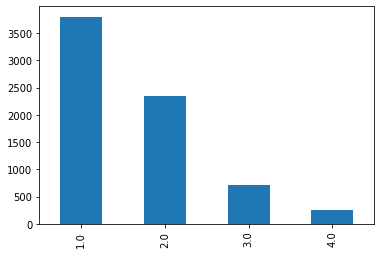

In [33]:
data["N_BEDROOM"].value_counts().plot(kind="bar")

#### Value analysis of bedroom

In [34]:
data["N_BEDROOM"].value_counts()

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [35]:
data["N_BEDROOM"].value_counts()/len(data["N_BEDROOM"])*100

1.0    53.397102
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

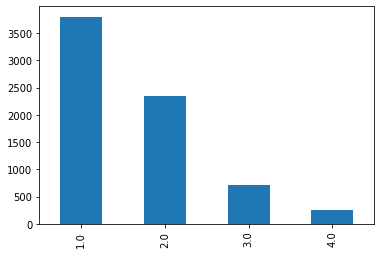

In [36]:
data["N_BEDROOM"].value_counts().plot(kind="bar")

#### Value analysis of bedroom

In [37]:
data["N_BATHROOM"].value_counts()

1.0    5593
2.0    1516
Name: N_BATHROOM, dtype: int64

In [38]:
data["N_BATHROOM"].value_counts()/len(data["N_BATHROOM"])*100

1.0    78.674919
2.0    21.325081
Name: N_BATHROOM, dtype: float64

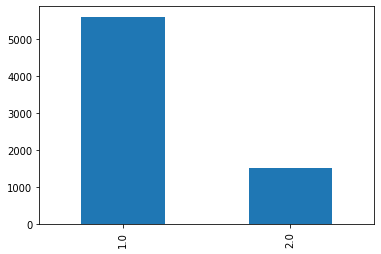

In [39]:
data["N_BATHROOM"].value_counts().plot(kind="bar")

#### Area analysis

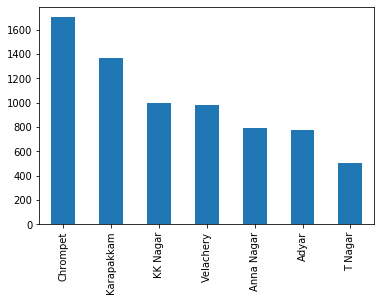

In [40]:
data["AREA"].value_counts().plot(kind="bar")

#### Sale Condition analysis

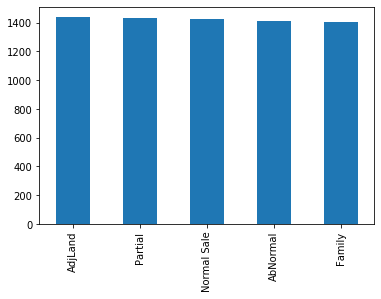

In [41]:
data["SALE_COND"].value_counts().plot(kind="bar")

#### Parking facilities analysis

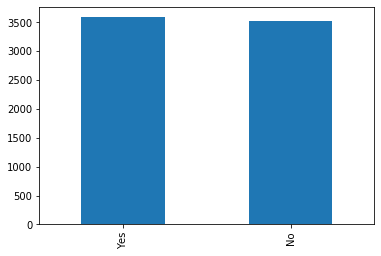

In [42]:
data["PARK_FACIL"].value_counts().plot(kind="bar")

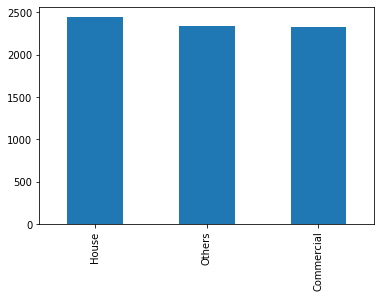

In [43]:
data["BUILDTYPE"].value_counts().plot(kind="bar")

#### Utility availbale analysis

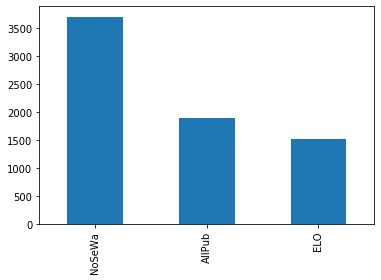

In [44]:
data["UTILITY_AVAIL"].value_counts().plot(kind="bar")

#### Street type analysis

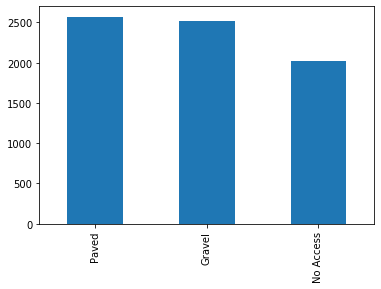

In [45]:
data["STREET"].value_counts().plot(kind="bar")

#### Mzzone analysis

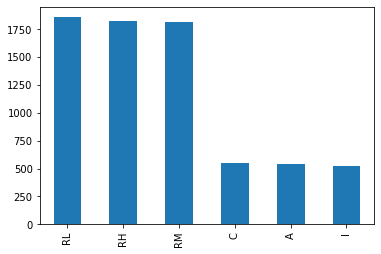

In [46]:
data["MZZONE"].value_counts().plot(kind="bar")

#### Analysing quality score of room

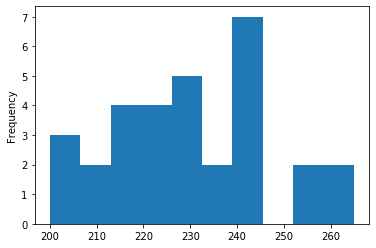

In [47]:
data["QS_ROOMS"].value_counts().plot(kind="hist")

#### Quality analysis of bathroom

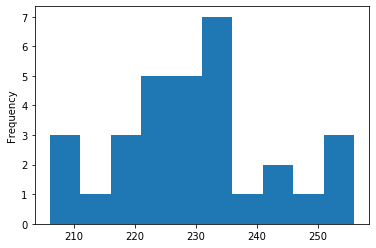

In [48]:
data["QS_BATHROOM"].value_counts().plot.hist()

#### Qaulity analysis of bedroom

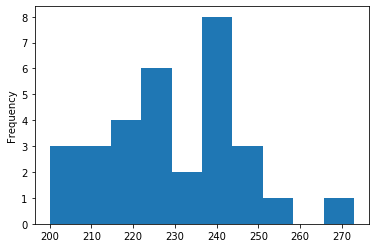

In [49]:
data["QS_BEDROOM"].value_counts().plot(kind="hist")

#### Overall Quality analysis

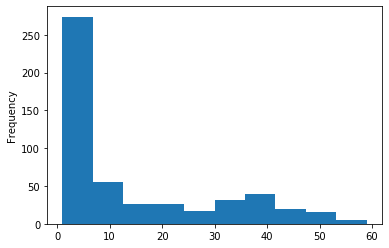

In [50]:
data["QS_OVERALL"].value_counts().plot(kind="hist")

#### Interior area anlysis 

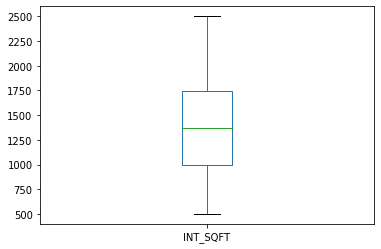

In [51]:
data["INT_SQFT"].plot.box()

Text(0.5, 0, 'Area in squarefeet')

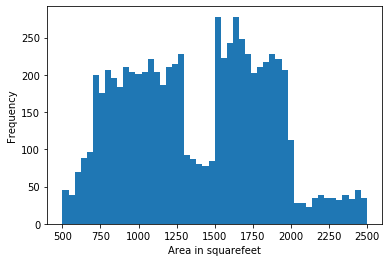

In [52]:
data["INT_SQFT"].plot.hist(bins=50)
plt.xlabel("Area in squarefeet")

#### Distace from main road analysis

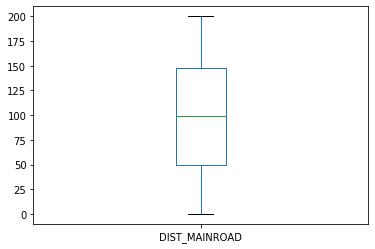

In [53]:
data["DIST_MAINROAD"].plot.box()

Text(0.5, 0, 'distace from main road')

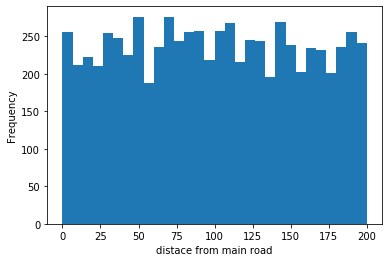

In [54]:
data["DIST_MAINROAD"].plot.hist(bins=30)
plt.xlabel("distace from main road")

#### Analysis of commision earned from houses

Text(0.5, 0, 'Commisision')

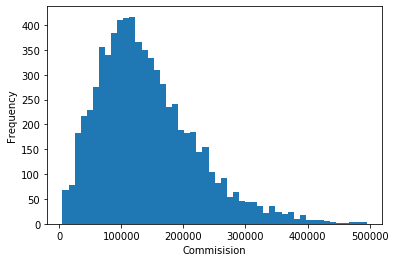

In [55]:
data["COMMIS"].plot.hist(bins=50)
plt.xlabel("Commisision")

Text(0.5, 0, 'Commisision')

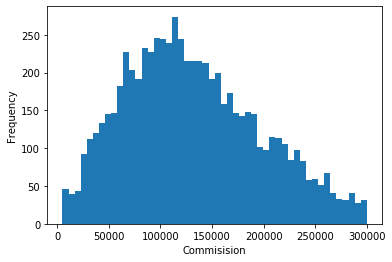

In [56]:
data[data["COMMIS"]<300000].COMMIS.plot.hist(bins=50)
plt.xlabel("Commisision")

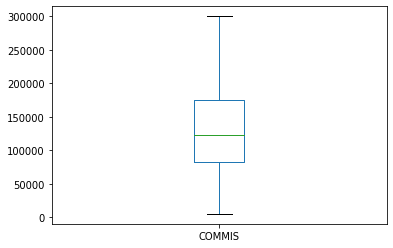

In [57]:
data[data["COMMIS"]<300000].COMMIS.plot.box()

#### Analysis of house sale price

Text(0.5, 0, 'Hoiuse price')

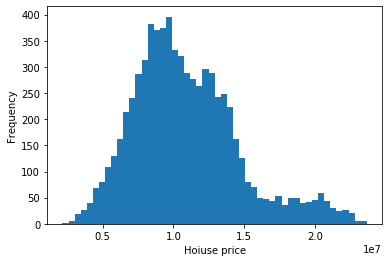

In [58]:
data["SALES_PRICE"].plot.hist(bins=50)
plt.xlabel("Hoiuse price")

Text(0.5, 0, 'Hoiuse price')

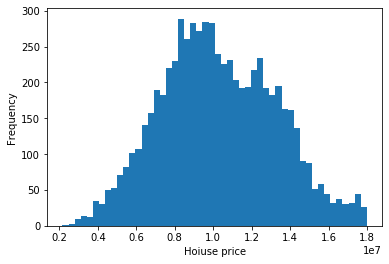

In [59]:
data[data["SALES_PRICE"]<18000000]["SALES_PRICE"].plot.hist(bins=50)
plt.xlabel("Hoiuse price")

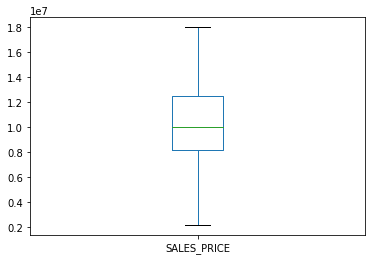

In [60]:
data[data["SALES_PRICE"]<18000000]["SALES_PRICE"].plot.box()

Text(0.5, 0, 'Hoiuse price')

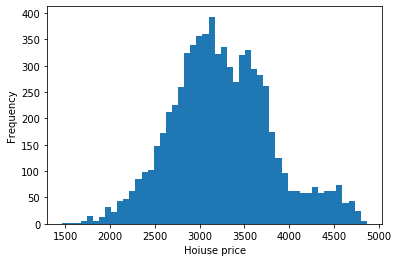

In [61]:
np.sqrt(data["SALES_PRICE"]).plot.hist(bins=50)
plt.xlabel("Hoiuse price")

Text(0.5, 0, 'Commisision')

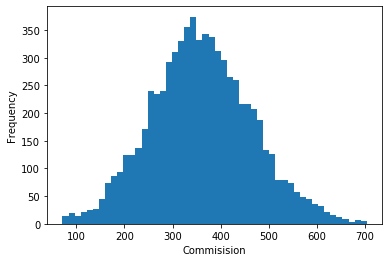

In [62]:
np.sqrt(data["COMMIS"]).plot.hist(bins=50)
plt.xlabel("Commisision")

## Bivariate Analysis of Data

#### Relation of Commission and Sales price

Text(0.5, 1.0, 'Plot of Commision and Sales Price')

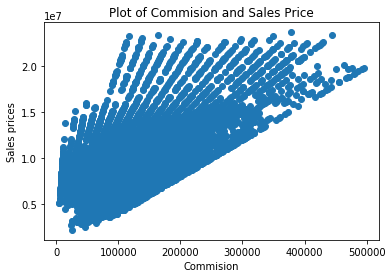

In [63]:
plt.figure(figsize=(6,4))
plt.scatter(data["COMMIS"],data["SALES_PRICE"])
plt.xlabel("Commision")
plt.ylabel("Sales prices")
plt.title("Plot of Commision and Sales Price")

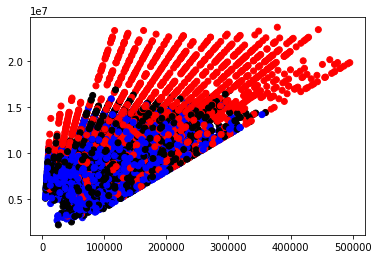

In [64]:
colors={"Commercial":"red","House":"blue","Others":"black"}
fig,ax=plt.subplots()
ax.scatter(data["COMMIS"],data["SALES_PRICE"],c=data["BUILDTYPE"].apply(lambda x:colors[x]))

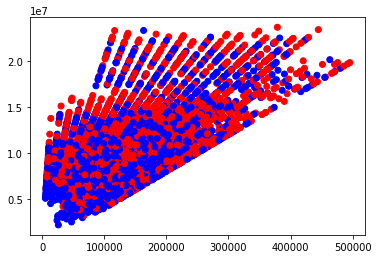

In [65]:
color={"Yes":"red","No":"blue"}
fig,ax=plt.subplots()
ax.scatter(data["COMMIS"],data["SALES_PRICE"],color=data["PARK_FACIL"].apply(lambda x:color[x]))

#### Realtion between interior area and sales price

Text(0.5, 1.0, 'Plot of Interior and Sales Price')

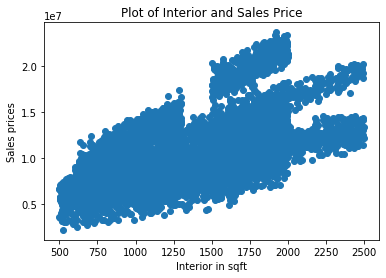

In [66]:
plt.figure(figsize=(6,4))
plt.scatter(data["INT_SQFT"],data["SALES_PRICE"])
plt.xlabel("Interior in sqft")
plt.ylabel("Sales prices")
plt.title("Plot of Interior and Sales Price")

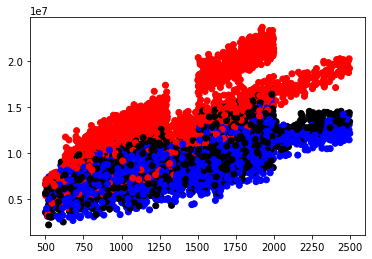

In [67]:
colors={"Commercial":"red","House":"blue","Others":"black"}
fig,ax=plt.subplots()
ax.scatter(data["INT_SQFT"],data["SALES_PRICE"],c=data["BUILDTYPE"].apply(lambda x:colors[x]))

#### Relation bewteen sales price and distace from main road

Text(0.5, 1.0, 'Plot of Distance from main road and Sales Price')

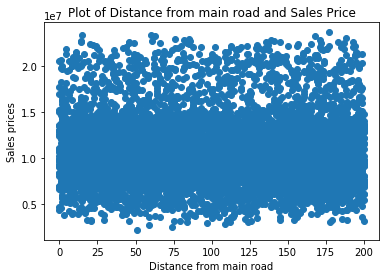

In [68]:
plt.figure(figsize=(6,4))
plt.scatter(data["DIST_MAINROAD"],data["SALES_PRICE"])
plt.xlabel("Distance from main road")
plt.ylabel("Sales prices")
plt.title("Plot of Distance from main road and Sales Price")

In [69]:
data["SALES_PRICE"]=np.sqrt(data["SALES_PRICE"])

In [70]:
data["COMMIS"]=np.sqrt(data["COMMIS"])

## Implementing Model

In [71]:
data.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380.000000,2756.809750
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,551.406384,4660.232827
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,303.502883,3627.561164
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,277.564407,3103.270855
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,272.145182,2721.442632


In [72]:
data=pd.concat([data,pd.get_dummies(data["AREA"]),pd.get_dummies(data["SALE_COND"]),pd.get_dummies(data["PARK_FACIL"]),
            pd.get_dummies(data["BUILDTYPE"]),pd.get_dummies(data["UTILITY_AVAIL"]),pd.get_dummies(data["STREET"]),
            pd.get_dummies(data["MZZONE"])],axis=1)


In [73]:
f_data=data.drop(["PRT_ID","AREA","SALE_COND","PARK_FACIL","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE"],axis=1)
f_data.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,...,NoSeWa,Gravel,No Access,Paved,A,C,I,RH,RL,RM
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380.000000,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,551.406384,...,0,1,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,303.502883,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,277.564407,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,272.145182,...,0,1,0,0,0,1,0,0,0,0


In [74]:
f_data.shape

(7109, 40)

In [75]:
f_data.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'COMMIS',
       'SALES_PRICE', 'Adyar', 'Anna Nagar', 'Chrompet', 'KK Nagar',
       'Karapakkam', 'T Nagar', 'Velachery', 'AbNormal', 'AdjLand', 'Family',
       'Normal Sale', 'Partial', 'No', 'Yes', 'Commercial', 'House', 'Others',
       'AllPub', 'ELO', 'NoSeWa', 'Gravel', 'No Access', 'Paved', 'A', 'C',
       'I', 'RH', 'RL', 'RM'],
      dtype='object')

In [76]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()

In [77]:
#f_data=pd.DataFrame(scaler.fit_transform(f_data),columns=f_data.columns)

In [78]:
#f_data.head()

#### Creating training and test set

In [79]:
target=f_data["SALES_PRICE"]
feature=f_data.drop("SALES_PRICE",axis=1)

In [80]:
target.head()

0    2756.809750
1    4660.232827
2    3627.561164
3    3103.270855
4    2721.442632
Name: SALES_PRICE, dtype: float64

In [81]:
feature.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,...,NoSeWa,Gravel,No Access,Paved,A,C,I,RH,RL,RM
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380.000000,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,551.406384,...,0,1,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,303.502883,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,277.564407,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,272.145182,...,0,1,0,0,0,1,0,0,0,0


In [82]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(feature,target,test_size=0.2,random_state=100)

In [83]:
from sklearn.linear_model import LinearRegression as LR
lr=LR(normalize=True)
lr.fit(train_x,train_y)
lr.score(train_x,train_y)

0.9759081500801063

In [84]:
test_predict=lr.predict(test_x)
train_predict=lr.predict(train_x)

In [85]:
lr.score(test_x,test_y)

0.9753286596904769

In [86]:
from sklearn.metrics import mean_squared_error as mae
train_error=mae(train_y,train_predict)
test_error=mae(test_y,test_predict)
train_error,test_error

(7562.971589494585, 7958.426570461735)

In [87]:
from sklearn.metrics import mean_squared_log_error as msle
train_error1=msle(train_y,train_predict)
test_error1=msle(test_y,test_predict)
train_error1,test_error1

(0.0007897763962465572, 0.0008250381161986981)

#### Cofficient Analysis

In [88]:
lr.coef_

array([ 6.09436872e-01, -1.85251935e-03, -5.16575698e+01, -2.52994388e+01,
        7.58512248e+01, -8.72899412e+00, -9.51506472e+00, -6.19202181e+00,
        3.73607208e+01,  1.57402007e-01, -3.61466688e+13, -3.61466688e+13,
       -3.61466688e+13, -3.61466688e+13, -3.61466688e+13, -3.61466688e+13,
       -3.61466688e+13,  3.09487244e+13,  3.09487244e+13,  3.09487244e+13,
        3.09487244e+13,  3.09487244e+13, -6.06822695e+13, -6.06822695e+13,
       -3.71333134e+13, -3.71333134e+13, -3.71333134e+13,  8.04298684e+13,
        8.04298684e+13,  8.04298684e+13,  1.06928825e+13,  1.06928825e+13,
        1.06928825e+13,  7.05604522e+13,  7.05604522e+13,  7.05604522e+13,
        7.05604522e+13,  7.05604522e+13,  7.05604522e+13])

Text(0.5, 1.0, 'Coefficients plot')

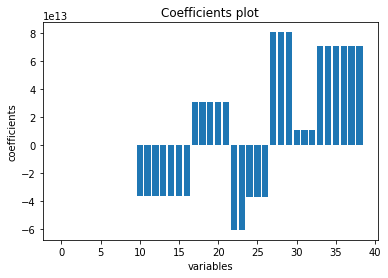

In [89]:
x=range(len(train_x.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel("variables")
plt.ylabel("coefficients")
plt.title("Coefficients plot")

#### Residuals Analysis

In [90]:
residuals=test_y-test_predict

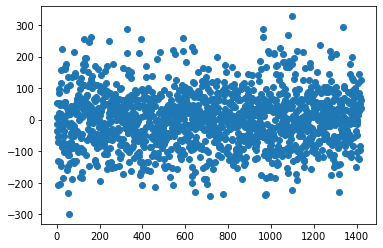

In [91]:
x=range(len(test_y))
plt.scatter(x,residuals)

Text(0.5, 1.0, 'Distribution of Error')

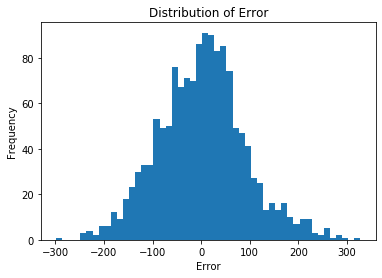

In [92]:
plt.figure(figsize=(6,4))
plt.hist(residuals,bins=50)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Distribution of Error")

In [106]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN(n_neighbors=12)
knn.fit(train_x,train_y)
knn.score(train_x,train_y)

0.5897708154473281

In [107]:
test_predict=knn.predict(test_x)
knn.score(test_x,test_y)

0.5470407509058262

In [118]:
error=[]
for i in range(1,100):
    knn=KNN(n_neighbors=i)
    knn.fit(train_x,train_y)
    error.append(knn.score(train_x,train_y))

Text(0.5, 1.0, 'Variation of error with K')

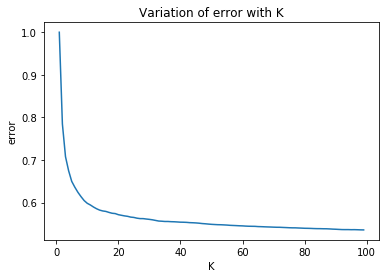

In [119]:
x=range(1,100)
plt.plot(x,error)
plt.xlabel("K")
plt.ylabel("error")
plt.title("Variation of error with K")

In [ ]:
#Hence value of K is apx 13

In [95]:
#knn score is very less and hence cannot be used

In [97]:
from sklearn.linear_model import Lasso as LSO
lso=LSO()
lso.fit(train_x,train_y)
lso.score(train_x,train_y)

0.9752793665034238

In [98]:
test_predict=lso.predict(test_x)
lso.score(test_x,test_y)

0.9747263004781491

In [130]:
from sklearn.tree import DecisionTreeRegressor as DT
dt=DT(max_depth=13)
dt.fit(train_x,train_y)
dt.score(train_x,train_y)

0.9977477907820417

In [131]:
test_predict=dt.predict(test_x)
dt.score(test_x,test_y)

0.9549281611123357